## K-means

In [1]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

iris = load_iris()
# 보다 편리한 데이터 Handling을 위해 DataFrame으로 변환
irisDF = pd.DataFrame(data=iris.data, columns=['sepal_length','sepal_width','petal_length','petal_width'])
irisDF.head(3)

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2


In [2]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [3]:
iris.feature_names


['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

모델 학습 및 예측

In [4]:
# n_clusters 센트로이드 개수
# init : 초기화 위치 알고리즘
kmeans = KMeans(n_clusters=3,random_state=0,verbose=0)
labels = kmeans.fit_predict(irisDF)

labels

c:\Users\dbwjd\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 0, 0, 2, 2, 2, 2, 0, 2, 0, 2, 0, 2, 2, 0, 0, 2, 2, 2, 2,
       2, 0, 2, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 2, 0, 2, 2, 0])

In [5]:
# 클러스터간의 응집도
kmeans.inertia_

78.85144142614601

In [6]:
irisDF['target'] = iris.target # 우리가 알고 있는 사실
irisDF['cluster']= labels      # kmean 결과
irisDF

,sepal_length,sepal_width,petal_length,petal_width,target,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2,2
146,6.3,2.5,5.0,1.9,2,0
147,6.5,3.0,5.2,2.0,2,2
148,6.2,3.4,5.4,2.3,2,2


In [7]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [8]:
irisDF.groupby(['target','cluster']).count()


sepal_length  sepal_width  petal_length  petal_width
target cluster                                                      
0      1                  50           50            50           50
1      0                  48           48            48           48
       2                   2            2             2            2
2      0                  14           14            14           14
       2                  36           36            36           36

### 군집화 시각화

In [9]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2) #2차원으로

pca_transformed = pca.fit_transform(iris.data) #아이리스 피처4개 넣고

pca_transformed.shape

(150, 2)

In [10]:
irisDF['pca_x'] = pca_transformed[:,0]
irisDF['pca_y'] = pca_transformed[:,1]
irisDF.head()

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755


In [11]:
pca = PCA(n_components=3) #3차원으로

pca_transformed = pca.fit_transform(iris.data)

pca_transformed.shape

(150, 3)

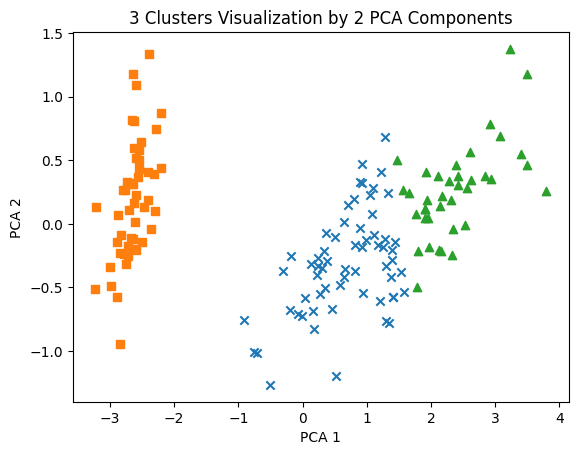

In [12]:
# cluster 값이 0, 1, 2 인 경우마다 별도의 Index로 추출
marker0_ind = irisDF[irisDF['cluster']==0].index
marker1_ind = irisDF[irisDF['cluster']==1].index
marker2_ind = irisDF[irisDF['cluster']==2].index

# cluster값 0, 1, 2에 해당하는 Index로 각 cluster 레벨의 pca_x, pca_y 값 추출. x, s, ^ 로 marker 표시
plt.scatter(x=irisDF.loc[marker0_ind,'pca_x'], y=irisDF.loc[marker0_ind,'pca_y'], marker='x') 
plt.scatter(x=irisDF.loc[marker1_ind,'pca_x'], y=irisDF.loc[marker1_ind,'pca_y'], marker='s')
plt.scatter(x=irisDF.loc[marker2_ind,'pca_x'], y=irisDF.loc[marker2_ind,'pca_y'], marker='^')

plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.title('3 Clusters Visualization by 2 PCA Components')
plt.show()

### 모델 평가

In [13]:
from sklearn.preprocessing import scale
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

%matplotlib inline

In [14]:
# 실루엣 분석 metric 값을 구하기 위한 API 추가
from sklearn.metrics import silhouette_samples, silhouette_score

# iris 의 모든 개별 데이터에 실루엣 계수값을 구함. 
score_samples = silhouette_samples(iris.data, irisDF['cluster'])

score_samples.shape


(150,)

In [15]:
# irisDF에 실루엣 계수 컬럼 추가
irisDF['silhouette_coeff'] = score_samples
irisDF.head(5)


,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955
1,4.9,3.0,1.4,0.2,0,1,-2.714142,-0.177001,0.815495
2,4.7,3.2,1.3,0.2,0,1,-2.888991,-0.144949,0.829315
3,4.6,3.1,1.5,0.2,0,1,-2.745343,-0.318299,0.805014
4,5.0,3.6,1.4,0.2,0,1,-2.728717,0.326755,0.849302


In [16]:
#군집중심점에서 다소 떨어져있는 데이터들
irisDF.sort_values(by='silhouette_coeff')

,sepal_length,sepal_width,petal_length,petal_width,target,cluster,pca_x,pca_y,silhouette_coeff
114,5.8,2.8,5.1,2.4,2,0,1.585928,-0.539641,0.026359
50,7.0,3.2,4.7,1.4,1,0,1.284826,0.685160,0.026722
134,6.1,2.6,5.6,1.4,2,2,1.781295,-0.499902,0.053286
52,6.9,3.1,4.9,1.5,1,2,1.464302,0.504263,0.053401
146,6.3,2.5,5.0,1.9,2,0,1.527167,-0.375317,0.104171
...,...,...,...,...,...,...,...,...,...
39,5.1,3.4,1.5,0.2,0,1,-2.590006,0.229044,0.850332
17,5.1,3.5,1.4,0.3,0,1,-2.648297,0.311849,0.851018
49,5.0,3.3,1.4,0.2,0,1,-2.703360,0.107706,0.852098
0,5.1,3.5,1.4,0.2,0,1,-2.684126,0.319397,0.852955


In [17]:
# 모든 데이터의 평균 실루엣 계수값을 구함. 
average_score = silhouette_score(iris.data, irisDF['cluster'])

#실루엣 계수의 평균값으로는 높은편이다.
average_score

0.5528190123564095

In [18]:
# 각 클러스터별 실루엣 계수 평균(1:setosa)
irisDF.groupby('cluster')['silhouette_coeff'].mean()

cluster
0    0.417320
1    0.798140
2    0.451105
Name: silhouette_coeff, dtype: float64

In [19]:
# 각 클러스터별 실루엣 계수 평균
irisDF.groupby('target')['silhouette_coeff'].mean()

target
0    0.798140
1    0.451922
2    0.408394
Name: silhouette_coeff, dtype: float64

In [20]:
iris.target_names


array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<Axes: >

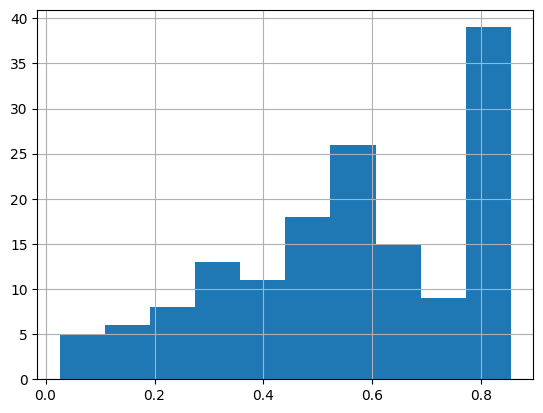

In [21]:
irisDF['silhouette_coeff'].hist()
